In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import copy
import networkx as nx

%matplotlib inline

In [2]:
snp = pd.read_csv("../data/snp_allstocks_2015_2019.csv")
idx = ["MSFT", "AAPL", "AMZN", "FB", "JNJ", "GOOG", "GOOGL", "BRK-B", "PG", "JPM"]
px = copy.deepcopy(snp[idx])

In [3]:
logpx = np.log(px)
simp_ret = px.pct_change( )
log_ret = logpx.diff()
# logret["MSFT"].plot()

In [4]:
# corr = logret.corr()
# corr = px.corr()
corr = simp_ret.corr()
print(corr)

           MSFT      AAPL      AMZN        FB       JNJ      GOOG     GOOGL  \
MSFT   1.000000  0.563900  0.613197  0.513157  0.409568  0.667528  0.657295   
AAPL   0.563900  1.000000  0.480547  0.457328  0.308107  0.512438  0.511329   
AMZN   0.613197  0.480547  1.000000  0.564170  0.280330  0.651638  0.649721   
FB     0.513157  0.457328  0.564170  1.000000  0.264173  0.608059  0.615064   
JNJ    0.409568  0.308107  0.280330  0.264173  1.000000  0.355059  0.360001   
GOOG   0.667528  0.512438  0.651638  0.608059  0.355059  1.000000  0.990642   
GOOGL  0.657295  0.511329  0.649721  0.615064  0.360001  0.990642  1.000000   
BRK-B  0.540307  0.445854  0.360621  0.350301  0.529064  0.462662  0.461890   
PG     0.366645  0.287790  0.207096  0.209453  0.456058  0.275686  0.276196   
JPM    0.489606  0.424672  0.340721  0.342443  0.426192  0.412073  0.409624   

          BRK-B        PG       JPM  
MSFT   0.540307  0.366645  0.489606  
AAPL   0.445854  0.287790  0.424672  
AMZN   0.360621 

In [5]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links


,var1,var2,value
0,MSFT,MSFT,1.000000
1,MSFT,AAPL,0.563900
2,MSFT,AMZN,0.613197
3,MSFT,FB,0.513157
4,MSFT,JNJ,0.409568
5,MSFT,GOOG,0.667528
6,MSFT,GOOGL,0.657295
7,MSFT,BRK-B,0.540307
8,MSFT,PG,0.366645
9,MSFT,JPM,0.489606


In [6]:
links_filtered=links.loc[ (links['value'] > 0.7) & (links['var1'] != links['var2']) ]
# links_filtered


In [7]:
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')


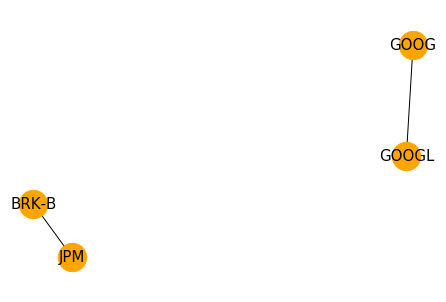

In [8]:
nx.draw(G, with_labels=True, node_color='orange', node_size=800, edge_color='black', linewidths=1, font_size=15)

